<h1 style="background-color:yellow; "> Table of Contents</h1> <a class="anchor" id="table-of-content"></a>
    
* [1. Problem Background & Motivation](#problem-background)
* [2. Library Importation](#import-package)
* [3. Custom Libraries](#custom-libraries)
* [4. Connect to Data Source and Data Extraction](#data-extraction)
* [5. Exploratory Data Analysis](#data-prep)
* [6. Machine Learning Model](#ml-model)
* [7. Deployment](#Deployment)
* [8. Conclusion](#Conclusion)


<h1 style="background-color:powderblue; ">1. Problem Background and Motivation</h1> <a class="anchor" id="problem-background"></a>

<h3> Loan Approval Prediction </h3>

<h2> 1.1 General Info </h2>
    Loan approval from a distinguished bank or any other is subject to a lot of constraints and processes. Many individuals with a great credit history and proper documentation do not get approval due to this heavy and long process. The 5 basic steps to applying for a loan are listed below:
   <p> 1. Application & Required Information is gathered and submitted. <br>
    2. Loan Underwriting <br>
    3. Decision & Pre-Closing <br>
    4. Closing <br>
    5. Post Closing<br>
   </p>
    
<img src="https://www.thenovahouse.com/wp-content/uploads/2022/05/s2.jpeg" alt="Loan Approval PNG" />


 
 
<h2> 1.2 What is the problem? </h2>
  
  The Loan approval  is a tedious process which requires lots of background checks and documentation before it is sanctioned. The time frame for approval is between a month or so depending on the applicant's submission of the required documents and checks. 
  
  In order to speed up the process for this approval/rejection of loans to an applicant, we can use the latest tech to build a ML model with accuracy. 
 

<h2> 1.3 Interested Party and Reason </h2>
   As mentioned in the problem statement, the intended user for this ML model would be the banks. As they are always approached for loans, they are the ones to benefit from this model. This model would save the bank an ample amount of time when approving the loans. After getting all the required data from the applicant, they just have to feed in this data to the model and they would have a decision of approval/rejection of loans.
    

 Advantages of having a ML model with Loan approval prediction powers:
  >- The Banks will have accurate model which would either approval  .
  >- Based on the above information, the bank can take appropriate actions in order to identify to whom the loan can be approved with due diligence. 
  >- The model will help cut down the process time for loan approval approval/rejection which will attract new customers to the bank as they have less wait time for processing the loan.


* [Go to Top](#table-of-content) 

<h1 style="background-color:powderblue; ">2. Library Importation</h1> <a class="anchor" id="import-package"></a>
  
  Import the required packages needed for the model.
  

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import pickle

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics

<h1 style ="background-color:powderblue;"> 3. Custom Built Libraries</h1> <a class="anchor" id="custom-libraries"> </a>

In [2]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1-Score":F1
                          })

    # Let's look at our dataframe
    return result

<h1 style="background-color:powderblue; ">4. Data Extraction and Initial Evaluation</h1> <a class="anchor" id="data-extraction"></a>


Read the input data and make sense of it.

In [3]:
# Read in data - To see what the data can tell us
url = 'https://github.com/Bhyrav17/LoanApproval_Classification/blob/main/Data/loan_approval.csv?raw=true'
df = pd.read_csv(url, index_col=0)

# get the last 10 records to get a count of the records and see the column data
df.tail(10) 

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
680,0,1,19.50,0.29,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0.29,0,0,0,0,1,0,0,364
681,0,1,27.83,1.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3.00,0,0,0,0,1,0,0,537
682,0,1,17.08,3.29,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0.34,0,0,0,1,1,0,0,2
683,0,1,36.42,0.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.58,0,0,0,0,1,0,0,3
684,0,1,40.58,3.29,1,1,1,0,0,0,0,0,0,1,0,0,0,0,3.50,0,0,0,1,0,1,0,0
685,0,1,21.08,10.09,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.25,0,0,0,0,1,0,0,0
686,0,0,22.67,0.75,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2.00,0,1,2,1,1,0,0,394
687,0,0,25.25,13.50,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.00,0,1,1,1,1,0,0,1
688,0,1,17.92,0.20,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0.04,0,0,0,0,1,0,0,750
689,0,1,35.00,3.38,1,1,1,0,0,0,0,0,0,0,1,0,0,0,8.29,0,0,0,1,1,0,0,0


In [4]:
# check number of rows with non null values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   approved               690 non-null    int64  
 1   gender                 690 non-null    int64  
 2   age                    690 non-null    float64
 3   debt                   690 non-null    float64
 4   married                690 non-null    int64  
 5   bank_customer          690 non-null    int64  
 6   emp_industrial         690 non-null    int64  
 7   emp_materials          690 non-null    int64  
 8   emp_consumer_services  690 non-null    int64  
 9   emp_healthcare         690 non-null    int64  
 10  emp_financials         690 non-null    int64  
 11  emp_utilities          690 non-null    int64  
 12  emp_education          690 non-null    int64  
 13  ethnicity_white        690 non-null    int64  
 14  ethnicity_black        690 non-null    int64  
 15  ethnic

> **Initial Evaluation - Notes on Findings**<br><br>
>**Observations:**<br>
>>**690 Records**<br><br>
>>**Outcome:** The target variable is **approved**<br>

The below observations is just assumptions made with the given data with logical aspects.

>- Its a Classification problem where the predictors are scheduled time, different carriers, origin of flight, destination of flight, bad weather and the days of the week.
>- approved ( 1 if the loan has been approved, 0 otherwise)
>- gender -  The gender of the applicant (1 if Male, O if female)
>- age - Age of the applicant ( Might be a potential  predictor)
>- debt - If the applicant has any debts, it will be mentioned here ( potential  predictor)
>- married - Applicant is married or not ( 1 if married, else 0)
>- bank_customer - If applicant is a bank customer, then 1 else 0
>- Applicant Work Industry( emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities	,emp_education) - explains which industry the applicant is working in.
>- Ethnicities ( ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other) - Explains the ethnicity of the applicant
>- years_employed - Applicant's work experience
>- prior_default - Check's the history of the applicant if he/she has ever made a default ( 1 if defaulted, 0 otherwise)
>- employed -If the applicant is employed or not ( 1 if employed, 0 otherwise) ( potential  predictor)
>- credit_score - Applicant's credit score ( potential  predictor)
>- drivers_license - 1 if the applicant has DL, 0 otherwise
>- Citizenship (citizen_bybirth,citizen_other,citizen_temporary) - Applicant's citizenship ( potential  predictor)
>- Income  - Applicant's income  ( potential  predictor)               


>[Go to Data Extraction](#data-extraction)

<h1 style="background-color:powderblue; ">5. Exploratory Data Analysis</h1> <a class="anchor" id="data-prep"></a>

* [Go to Top of Notebook](#table-of-content)

- [X] [Initial Evaluation](#data-extraction)
- [X] [Initial Cleanup - Duplicates and missing values](#missing-values)
- [X] [Outlier Detection & Treatment](#outliers-treatment)
- [X] [Feature Selection](#feature-selection)
- [X] [Feature Transformations](#feature-transformations)
- [X] [Data Partitioning](#data-split)
- [X] [Data Normalization](#data-norm)


> <h3 style="color:MediumSeaGreen;"> Initial Cleanup - dupes, missing values </h3> <a class="anchor" id="missing-values"></a>

In [5]:
df.columns = df.columns.str.replace(' ', '_') # replacing the spaces in the columns with underscore 

In [6]:
df.isnull().sum()  #isnull() counts all the nulls in the columns and sum() adds them up for every column

approved                 0
gender                   0
age                      0
debt                     0
married                  0
bank_customer            0
emp_industrial           0
emp_materials            0
emp_consumer_services    0
emp_healthcare           0
emp_financials           0
emp_utilities            0
emp_education            0
ethnicity_white          0
ethnicity_black          0
ethnicity_latino         0
ethnicity_asian          0
ethnicity_other          0
years_employed           0
prior_default            0
employed                 0
credit_score             0
drivers_license          0
citizen_bybirth          0
citizen_other            0
citizen_temporary        0
Income                   0
dtype: int64

> **Initial Cleanup:** <br>
> *Summary*<br>
>>- There was no nulls or dupes present in the data.


>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Outlier Detection & Treatment </h3> <a class="anchor" id="outliers-treatment"></a>

In [7]:
DataTypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_temp = df.select_dtypes(include=DataTypes)


df_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
approved,690.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
gender,690.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
age,690.00,31.51,11.86,13.75,22.67,28.46,37.71,80.25
debt,690.00,4.76,4.98,0.00,1.00,2.75,7.21,28.00
married,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
bank_customer,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
emp_industrial,690.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
emp_materials,690.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
emp_consumer_services,690.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
emp_healthcare,690.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00


<AxesSubplot:xlabel='approved', ylabel='Count'>

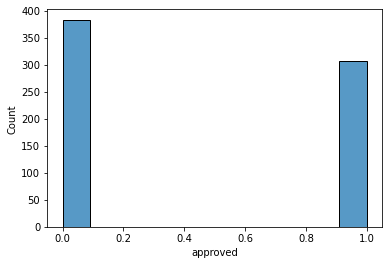

In [8]:
sns.histplot(data=df,x='approved')

> **Outlier Detection: Summary of Actions**<br>
<br>
>**Note:**<br>
    >- There was no outliers found in this data
    >- There is a small class imbalance problem as seen from the figure. Need to check if sampling is needed for these type ( where it is minor imbalance).

>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Feature Selection</h3> <a class="anchor" id="feature-selection"></a>

In [9]:
df.select_dtypes(include=DataTypes).corr().round(3)

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
approved,1.00,-0.03,0.16,0.21,0.18,0.19,0.03,0.15,-0.17,-0.18,-0.10,0.24,0.04,-0.05,0.19,-0.18,-0.01,0.02,0.32,0.72,0.46,0.41,0.03,0.09,-0.11,0.04,0.18
gender,-0.03,1.00,0.04,-0.04,-0.07,-0.07,0.19,-0.21,-0.00,-0.12,-0.02,0.03,0.03,0.08,-0.04,-0.13,0.08,-0.06,0.09,-0.03,-0.08,-0.03,0.05,-0.08,0.08,0.01,-0.00
age,0.16,0.04,1.00,0.20,0.11,0.10,-0.06,-0.06,-0.04,0.17,-0.00,-0.01,0.14,-0.21,0.02,0.17,0.12,0.08,0.39,0.20,0.09,0.19,0.05,0.01,-0.02,0.01,0.02
debt,0.21,-0.04,0.20,1.00,0.07,0.08,-0.09,0.03,-0.01,0.06,-0.04,0.02,0.13,-0.12,0.06,0.04,-0.00,0.12,0.30,0.24,0.17,0.27,-0.01,0.12,-0.12,-0.04,0.12
married,0.18,-0.07,0.11,0.07,1.00,0.99,0.00,0.13,0.01,-0.08,-0.09,-0.00,-0.00,0.04,-0.00,-0.09,0.04,-0.02,0.07,0.14,0.17,0.11,-0.01,-0.02,0.01,0.03,-0.01
bank_customer,0.19,-0.07,0.10,0.08,0.99,1.00,-0.00,0.13,0.01,-0.07,-0.09,0.01,-0.00,0.03,-0.00,-0.08,0.04,-0.01,0.08,0.14,0.17,0.11,-0.00,-0.04,0.02,0.06,0.06
emp_industrial,0.03,0.19,-0.06,-0.09,0.00,-0.00,1.00,-0.27,-0.38,-0.22,-0.23,-0.27,-0.14,0.28,-0.10,-0.23,-0.04,-0.12,0.00,-0.01,0.04,0.01,0.01,-0.12,0.08,0.12,-0.04
emp_materials,0.15,-0.21,-0.06,0.03,0.13,0.13,-0.27,1.00,-0.19,-0.10,-0.11,-0.13,-0.07,0.00,0.15,-0.11,-0.11,-0.01,0.05,0.16,0.15,0.08,0.02,0.09,-0.08,-0.04,0.02
emp_consumer_services,-0.17,-0.00,-0.04,-0.01,0.01,0.01,-0.38,-0.19,1.00,-0.15,-0.16,-0.18,-0.10,0.03,-0.10,-0.15,0.30,-0.09,-0.05,-0.11,-0.20,-0.10,0.05,-0.01,0.03,-0.06,-0.06
emp_healthcare,-0.18,-0.12,0.17,0.06,-0.08,-0.07,-0.22,-0.10,-0.15,1.00,-0.09,-0.10,-0.06,-0.35,-0.14,0.94,-0.09,-0.03,-0.08,-0.17,0.00,-0.04,-0.11,0.04,-0.05,0.02,0.07


In [10]:
#Plotting heat map to visualize the correlations - More user friendly than to check with the numbers and signs.  
#I'm choosing to share this map as it makes life easier by letting us find the strong/weak correlations faster
#df_corr=df.corr().round(3)
#f,ax=plt.subplots(figsize=(12,7))
#sns.heatmap(df_corr,cmap='viridis',annot=True)
#plt.title("Correlation between features",weight='bold',fontsize=18)
#plt.show()

>**Note:**<br>
>Features with Strong/Weak Correlations :
>1. gender (weak correlation)(-)
>2. age (strong correlation) (+)
>3. debt (strong correlation) (+)
>4. married (strong correlation) (+)
>5. bank_customer (strong correlation) (+)
>6. Applicant Work Industry(emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities	,emp_education) ( Mix of strong and weak correlations)
>7. Ethnicities ( ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other) ( Mix of strong and weak correlations)
>8. years_employed (strong correlation) (+)
>9. prior_default (strong correlation) (+)
>10. employed (strong correlation) (+)
>11. credit_score (strong correlation) (+)
>12. drivers_license (weak correlation)(+)
>13. Citizenship (citizen_bybirth,citizen_other,citizen_temporary) (weak correlation)
>14. Income (strong correlation) (+)


**NOTE:**
     There is some sensitive data included in the dataset such as age, ethnicities, gender etc. which cannot be used in certain parts of the world due to the laws. It is considered as personal data and is not to be shared.
     
   For our first try, we are going to run with all the predictor variables and see the results. Then doing feature selection to only consider data which doesn't invlove sensitive data and weak correlations)

<br>
<br>

In [11]:
# Dropping all  vars not in the final list above
#df = df.drop(['age','ethnicity_white','ethnicity_black','ethnicity_latino','ethnicity_asian','ethnicity_other',
 #             'drivers_license','citizen_bybirth','citizen_other','citizen_temporary'], axis=1)

>**Decision:**<br>
>1. Going with all the predictor variables for now ( Can come back and revisit it later if for any reason)
<br><br>
>**NOTE:** <br>
   We have to keep in mind that, for classification problems - we do regularization to pick the features. Can check once again coming back


>[Go to Data Prep Index](#data-prep)

> **Feature Selection:** <br>
> *Summary*<br>
>>- Keeping all the predictor variables<br>

>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Feature Transformation</h3> <a class="anchor" id="feature-transformations"></a>

> **Feature Transformation:** <br>
> *Summary*<br>
>>- All the variables are in the desired formats, hence no need of feature transformation<br>



>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Data Partition - TTS </h3> <a class="anchor" id="data-split"></a>

>- 1. Encompassing all the predictor variables into a variable X  <br>
>- 2. Encompassing the target variable to variable Y<br>
>- 3. Split the Training and Test Data by 70/30 with random state- 0<br>

In [12]:
target = ['approved']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

In [13]:
#To check how the data has been split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(483, 26)
(483, 1)
(207, 26)
(207, 1)


>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Data Normalization </h3> <a class="anchor" id="data-norm"></a>

In [14]:
# Normalizing the predictor variables using Z-Scores method.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>**NOTE:**:
 Always do Data Normalization for KNN as it is sensitive to the scaling of the data. It's always a good idea to do it when this model is involved.

>[Go to Data Prep Index](#data-prep)

<h1 style="background-color:powderblue; ">6. Machine Learning </h1> <a class="anchor" id="ml-model"></a>

- [X] [kNN classifier](#first-model)
- [X] [Logistic Regression](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **Model 1** <a class="anchor" id="first-model"></a>
<br>
>Info:<br>

>KNN classifer:
>- Finds the nearest neighour and assigns the new record to the variable with the most votes  
>- Pick an odd number for KNN as there would be no ambiguity during voting 
>- Evaluate using accuracy

In [15]:
# 1. Looping through different values of K to find optimal value of K
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.72
1,3,0.77
2,5,0.79
3,7,0.78
4,9,0.78
5,11,0.78
6,13,0.78
7,15,0.78
8,17,0.79
9,19,0.80


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 5 as this achieves the highest accuracy value <br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.87
Testing data Accuracy: 0.79


#### Elbow Graph method

In [17]:
#Trying the elbow graph to find the best value of K - This takes into account the error rate to decide on the value of K

error_rate = []

# Will take some time
for i in range(1,40):    
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train.values.ravel())
    pred_i = knn1.predict(X_test)
    pred_i = pred_i.reshape(X_test.shape[0],1)
    error_rate.append(np.mean(pred_i != y_test,axis=0))

Text(0, 0.5, 'Error Rate')

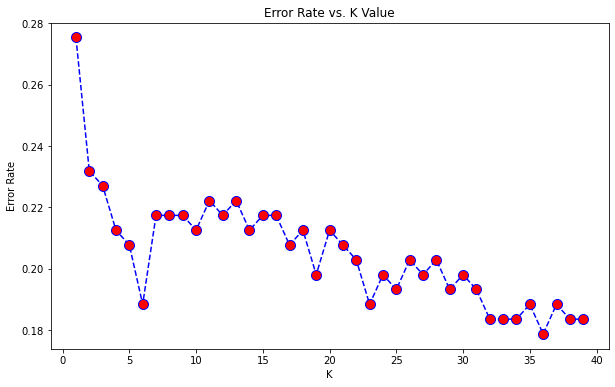

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

> **MODEL1(KNN) - Summary and Questions** <br>
> *Summary*<br>
>>- The Accuracy score is the highest for a certain value of k, hence we select a value of K which does not overfit/underfit the data too much i.e. k=5<br>
>>- Tried the elbow graph - We see that the graph has a lowest error when k=5 and goes up again after that, hence we are selecting a value of k to be 5<br>


> **Model 2** <a class="anchor" id="second-model"></a>
<br>
>Logistic Regression( Logistic Model):

>- Running the same data with logit model to compare the performance
>- Defining multiple thresholds to check which is better


In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

#predicting the values with the trained model
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.89
Testing data Accuracy: 0.85


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

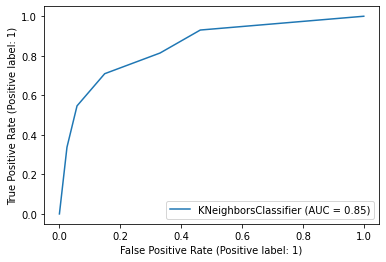

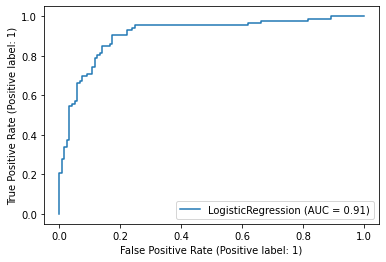

In [20]:
# ROC curve for kNN
metrics.RocCurveDisplay.from_estimator(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.RocCurveDisplay.from_estimator(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our **Logistic Model** so I will use that model to further evaluate probability thresholds and corresponding performance measures

> **Performance metrics** <a class="anchor" id="perf-eval"></a>

In [21]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\psupr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-Score
0,0.00,86,0,121,0,0.41,1.00,0.42,0.59
1,0.10,82,78,43,4,0.66,0.95,0.77,0.78
2,0.20,82,91,30,4,0.73,0.95,0.84,0.83
3,0.30,78,94,27,8,0.74,0.91,0.83,0.82
4,0.40,74,100,21,12,0.78,0.86,0.84,0.82
5,0.50,70,105,16,16,0.81,0.81,0.85,0.81
6,0.60,64,108,13,22,0.83,0.74,0.83,0.79
7,0.70,61,109,12,25,0.84,0.71,0.82,0.77
8,0.80,54,114,7,32,0.89,0.63,0.81,0.73
9,0.90,40,117,4,46,0.91,0.47,0.76,0.62


1. **Prob Threshold = 0.2**:
    - The probability threshold is set to 20%, which means if the predicted probabilities is greater than or equal to 0.2, then it is termed as loan approved(1) , 0 otherwise(Not approved)
    - Low threshold value leads our model in predicting more number of loans getting approved.
    - False positive (FP) - This is in line with the probability taken for observation and is relatively high (30). If the Bank gives importance to this measure,the model will wrongly approve the applicant's loan even though its not. I think making a False Positive mistake is a lot costlier as the bank has to go through the applicant's profile all over again when he/she draws the money from the loan account. It becomes a cumbersome task to retrieve that money, which leads the bank in spending more money.
    - False Negative (FN) - The number is 4 --> reflects in a good recall score. If the bank gives importance to this measure,the model will not approve loan to the applicant even though the applicant has been approved. This also has the consequence of making the customer angry as the applicant will approach the bank to clear the doubts why he/she didn't get approval even though they had all the proper documents. This will lead to higher times for processing the loan again. This is also a costly mistake to make.

       
<br><br>
2. **Prob Threshold = 0.5**:
    - The probability threshold is set to 50%, which means if the predicted probabilities is greater than or equal to 0.5 then it is termed as as loan approved else not approved(0)
    - False Positive - 16
    - False Negative - 16
    - is this a better threshold than 0.2?   - Yes, As i'm considering the FP and FN to be the most costliest mistake, reducing the same will lead to better results for the bank. Checking the precision and recall score : 81% , this means that it penalizes both the mistakes. We can see that we also have good accuracy and F1 score on the same threshold. This would be an ideal threshold to set.
<br><br>


3. **Prob Threshold = 0.8**:
    - The probability threshold is set to 80%, which means if the predicted probabilities is greater than or equal to 0.8, then it is termed as TasKCompleted(1) else not completed(0)
    - False Positive - 7
    - False Negative - 32
    - is this a better threshold than 0.2 and 0.5?- NO, i'm considering FP and FN - The precsion score is high enough but the recall score is not. This threshold would have done justice if the FP was the costliest mistake to make.
<br><br>


4. **Which threshold would you choose?  Justify your decision.**

    > According to my business understanding, making both a FALSE POSITIVE or FALSE NEGATIVE mistake is more costly to the bank as the bank has to spend time on the applicant's profile and documents once again. So, I'm considering both FP and FN, while looking at the F1 score.
    
    Hence, I would consider the probability threshold of 50% and penalize the model when it makes both kind of mistakes- FALSE Positive mistake (Precision) and False Negative Mistake (Recall).

<h1 style="background-color:powderblue; ">7. Deployment </h1> <a class="anchor" id="Deployment"></a>

* [Go to Top](#table-of-content)

In [22]:
pickle_out = open('classifier', mode='wb')
pickle.dump(lr_model, pickle_out)
pickle_out.close()

In [23]:
%%writefile app.py

import pickle
import streamlit as st

pickle_in = open('classifier', 'rb')   #Unpickling
classifier = pickle.load(pickle_in)

st.set_page_config(page_title='Loan Approval ', page_icon="💳")    #The set_page_config method lets us define the webpage title name and icon

@st.cache()


# Define the function which will make the prediction using data
# inputs from users
def prediction(gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,
               emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,
               ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,
               citizen_other,citizen_temporary,Income):
    
    # Make predictions
    prediction = classifier.predict(
        [[gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,
               emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,
               ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,
               citizen_other,citizen_temporary,Income]])
    
    if prediction == 0:
        pred = 'Your LOAN is APPROVED'
    else:
        pred = 'LOAN has been Declined :/'
    return pred

# This is the main function in which we define our webpage
def main():
    
    st.title("Loan Appoval Model")   # Title of the model displayed in the webpage
    
    #Give a little bit information of the Model
    st.info('The Model takes in the below predictor variables and predicts if an applicant will get the loan sanctioned or not.', icon="ℹ️")
    
    # Create input fields
    age = st.number_input("What's age of the applicant? (In years)",
                                  min_value=13.0,
                                  max_value=81.0,
                                  value=13.75,
                                  step=0.5,
                                 )
    debt = st.number_input("How much debt does the applicant have? ",
                                  min_value=0.0,
                                  max_value=28.0,
                                  value=0.0,
                                  step=0.5,
                                 )
    credit_score = st.number_input("What's the credit score of the applicant? ",
                                  min_value=0,
                                  max_value=67,
                                  value=0,
                                  step=3,
                                 )
    years_employed = st.number_input("How many years was the applicant employed?",
                                  min_value=0.0,
                                  max_value=29.0,
                                  value=0.0,
                                  step=0.5,
                                 )
    Income = st.number_input("what is the income of the applicant?",
                                  min_value=0,
                                  max_value=100000,
                                  value=0,
                                  step=500,
                                 )
    gender = st.number_input("Is the applicant male or female? ('1' for Male and '0' for Female) ",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )

    married = st.number_input("Is the applicant married?('1' for Yes and '0' for NO)",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )
    bank_customer = st.number_input("Is the applicant a bank customer?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    emp_industrial = st.number_input("Is the applicant working in Industrial Sector?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    emp_materials = st.number_input("Is the applicant working in materials Sector?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    emp_consumer_services = st.number_input("Is the applicant working in Consumer Services Sector?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    emp_healthcare = st.number_input("Is the applicant working in Healthcare Sector?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    emp_financials = st.number_input("Is the applicant working in Financials Sector?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    emp_utilities = st.number_input("Is the applicant working in Utilities Sector?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    emp_education = st.number_input("Is the applicant working in Education Sector?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    ethnicity_white = st.number_input("Is the applicant's ethnicity - White?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    ethnicity_black = st.number_input("Is the applicant's ethnicity - Black?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    ethnicity_latino = st.number_input("Is the applicant's ethnicity - Latino?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    ethnicity_asian = st.number_input("Is the applicant's ethnicity - Asian?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    ethnicity_other = st.number_input("Is the applicant's ethnicity - Other?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    prior_default = st.number_input(" Does the applicant havs ever committed default?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    employed = st.number_input("Is the applicant employed?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    drivers_license = st.number_input("Does the applicant have driver's license?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    citizen_bybirth = st.number_input(" Is the Applicant's citizenship - BY Birth?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    citizen_temporary = st.number_input("Is the Applicant's citizenship - Temporary?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    citizen_other = st.number_input("Is the Applicant's citizenship - Other?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,
               emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,
               ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,
               citizen_other,citizen_temporary,Income)
        st.success(result)
        #If the predictions are true, celebrate that the model is properly working, else spit out a  warning
        if(result == 'Your LOAN is APPROVED'):
            st.balloons()   
        else:
            st.image('https://d2gg9evh47fn9z.cloudfront.net/800px_COLOURBOX4207559.jpg',caption="Loan Not Approved",width=500)
    
    st.image("https://upload.wikimedia.org/wikipedia/commons/f/f3/W._P._Carey_School_of_Business_logo.png", width = 150)
    st.write("Built by Supreeth P")
    st.write("Version 1.0.0")
    
if __name__=='__main__':
    main()

Overwriting app.py


**NOTE:**
> I tried to change the default probability threshold sent to the pickle file or streamlit ( the ouput deployment) by using pred_proba instead of predict call. Ran into some issues while encoding this with the predictor variables. Still working on this and will get in touch If i'm unable to find the solution.

In [24]:
!streamlit run app.py

^C


<h1 style="background-color:powderblue; ">6. Conclusion </h1> <a class="anchor" id="Conclusion"></a>

* [Go to Top](#table-of-content)

> Coming from a data scientist point of view and in the banking domain, I would address my superiors in the company that making both the type of mistakes is costly and we would need to pay attention to both.

> Based the developed models, I would consider the Logit Model which has better AUC than KNN

> I would consider the probability threshold of 50% and penalize the model for both the mistakes - FP and FN. Hence, consider the F1 Score

> Due to the imbalance in the dataset, our streamlit app will be more leaning towards to one result ( More number of 0's ). This is evident when the app is run and prediction is seen.
